## ROMY Noise

In [2]:
import os
import gc
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

In [ ]:
config = {}

config['path_to_models'] = data_path+f"LNM2/PSDS/"

## Load Data

In [4]:
df_models = pd.read_csv(data_path+"LNM/data/FINAL/"+"TLNM_to_RLNM.csv")

In [8]:
date_str = "2024-01-01_2024-03-31"

romy_z = pd.read_pickle(data_path+f"LNM2/data/PSD_statistics_ROMY_BJZ_{date_str}.pkl")
romy_n = pd.read_pickle(data_path+f"LNM2/data/PSD_statistics_ROMY_BJN_{date_str}.pkl")
romy_e = pd.read_pickle(data_path+f"LNM2/data/PSD_statistics_ROMY_BJE_{date_str}.pkl")

romy_u = pd.read_pickle(data_path+f"LNM2/data/PSD_statistics_ROMY_BJU_{date_str}.pkl")
romy_v = pd.read_pickle(data_path+f"LNM2/data/PSD_statistics_ROMY_BJV_{date_str}.pkl")


In [15]:
romy_z

,frequencies,psds_median,perc_low,perc_high
0,0.000000,1.131370e-20,6.789648e-23,1.173503e-16
1,0.000139,2.105235e-20,1.574594e-22,2.229222e-16
2,0.000278,1.960056e-20,1.776419e-22,2.224622e-16
3,0.000417,1.966137e-20,2.016089e-22,2.344757e-16
4,0.000556,1.901651e-20,2.464264e-22,2.425029e-16
...,...,...,...,...
35997,4.999375,7.222354e-20,5.628777e-21,9.254415e-18
35998,4.999514,7.168277e-20,5.290029e-21,8.562299e-18
35999,4.999653,7.189753e-20,5.238590e-21,9.360517e-18
36000,4.999792,7.148548e-20,4.853481e-21,8.955429e-18


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


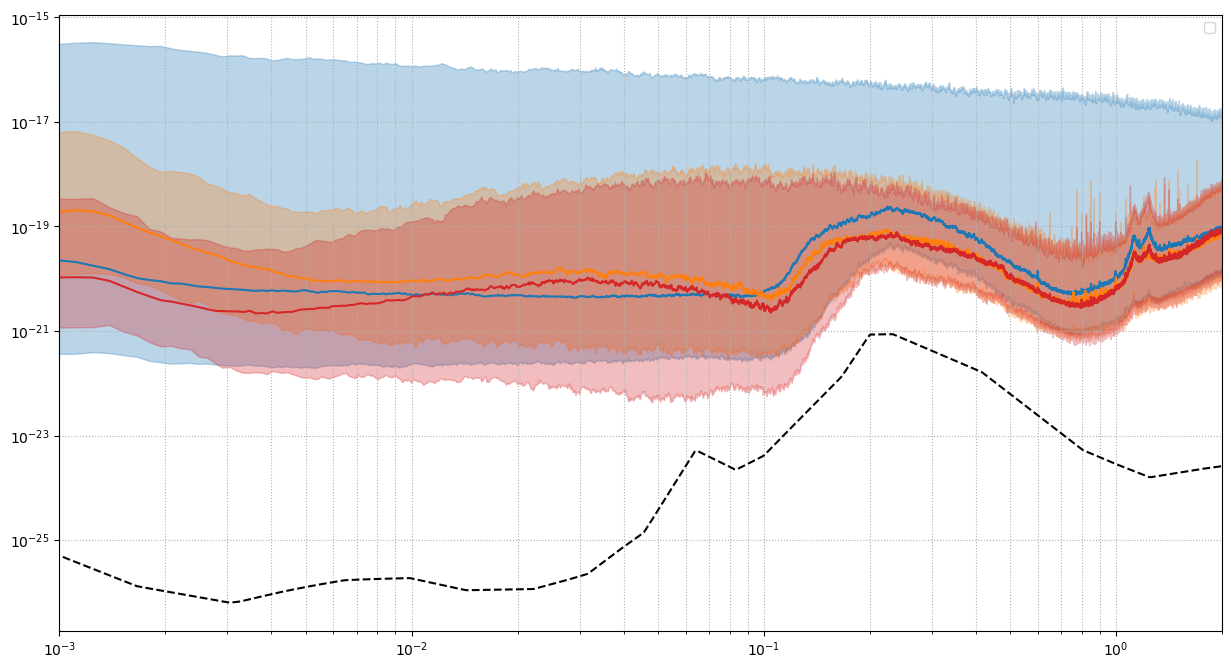

In [23]:
def __makeplot():

    Nrow, Ncol = 1, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8))

    ax.plot(df_models.frequencies, df_models.nlnm_rot_rate, ls="--", color="black")

    ax.plot(romy_z.frequencies, romy_z.psds_median, ls="-", color="tab:blue")
    ax.fill_between(romy_z.frequencies, romy_z.perc_low, romy_z.perc_high, color="tab:blue", alpha=0.3)

    ax.plot(romy_u.frequencies, romy_u.psds_median, ls="-", color="tab:orange")
    ax.fill_between(romy_u.frequencies, romy_u.perc_low, romy_u.perc_high, color="tab:orange", alpha=0.3)

    ax.plot(romy_v.frequencies, romy_v.psds_median, ls="-", color="tab:red")
    ax.fill_between(romy_v.frequencies, romy_v.perc_low, romy_v.perc_high, color="tab:red", alpha=0.3)


    ax.grid(which="both", ls=":", zorder=0)
    ax.legend(loc=1)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(1e-3, 2e0)

    plt.show();
    return fig


fig = __makeplot();